In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [11]:
df = pd.read_csv("C:/Users/balad/OneDrive/Documents/Projects/flights-encoded.csv")
df.head

<bound method NDFrame.head of         month  day  sched_dep_time  dep_delay  sched_arr_time  arr_delay  \
0           1    1             315        2.0             499       11.0   
1           1    1             329        4.0             510       20.0   
2           1    1             340        2.0             530       33.0   
3           1    1             345       -1.0             622      -18.0   
4           1    1             360       -6.0             517      -25.0   
...       ...  ...             ...        ...             ...        ...   
327341      9   30            1365       -5.0            1431      -17.0   
327342      9   30            1370      -10.0               7      -20.0   
327343      9   30            1366       -5.0               1      -16.0   
327344      9   30            1375       12.0            1438        1.0   
327345      9   30            1439      -10.0             230      -25.0   

        carrier  flight  origin  dest  distance  day_of_w

In [12]:
selected_feature = 'arr_delay'

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df[selected_feature].quantile(0.25)
Q3 = df[selected_feature].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows containing outliers
outlier_rows = df[(df[selected_feature] < lower_bound) | (df[selected_feature] > upper_bound)]

# Delete rows containing outliers
df_cleaned = df.drop(outlier_rows.index)

# Optional: Check the number of outliers removed
num_outliers_removed = len(outlier_rows)
print(f"Number of outliers removed: {num_outliers_removed}")

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

Number of outliers removed: 27880


In [15]:
# Split dataset into features (X) and target variable (y)
X = df_cleaned.drop('arr_delay', axis=1)
y = df_cleaned['arr_delay']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),  # Additional Dense layer
    Dense(16, activation='relu'),  # Additional Dense layer
    Dense(1)  # Output layer for regression with linear activation
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Display model summary
model.summary()

# Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the Model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on Test Set: {mae}")

C:\Users\balad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 253.3204 - mae: 12.2403 - val_loss: 234.7866 - val_mae: 11.6662
Epoch 2/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 235.6027 - mae: 11.7658 - val_loss: 232.0268 - val_mae: 11.5945
Epoch 3/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 233.0201 - mae: 11.7097 - val_loss: 230.4895 - val_mae: 11.6505
Epoch 4/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 231.6799 - mae: 11.6745 - val_loss: 228.1909 - val_mae: 11.5273
Epoch 5/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 228.1460 - mae: 11.5738 - val_loss: 227.0552 - val_mae: 11.5185
Epoch 6/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 228.1688 - mae: 11.5767 - val_loss: 226.0748 - val_mae: 11.5225
Epoch 7/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 226.2816 - mae: 11.5348 - val_loss: 225.2892 - val_mae: 11.4934
Epoch 8/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 227.0196 - mae: 11.5358 - val_loss: 224.4552 - v

1872/1872 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Mean Squared Error: 222.36637286103812
Root Mean Squared Error: 14.91195402558089
R-squared: 0.4906713295363616


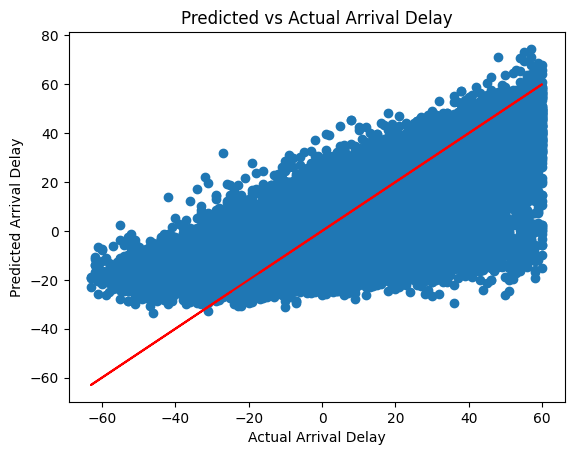

Error Metrics:
	Mean Squared Error (MSE): 222.3664
	Root Mean Squared Error (RMSE): 14.9120 minutes
	Mean Absolute Error (MAE): 11.4242 minutes

Correlation Metric:
	R-squared: 0.4907


In [14]:
import seaborn as sns
from scipy.stats import kde
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate additional performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Plot the predicted vs actual values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Arrival Delay")
plt.ylabel("Predicted Arrival Delay")
plt.title("Predicted vs Actual Arrival Delay")
plt.plot(y_test, y_test, color='red')  # Add a reference line for perfect prediction
plt.show()


# Assuming you already have y_test (actual values) and y_pred (predicted values)

# Error Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print the error metrics
print("Error Metrics:")
print(f"\tMean Squared Error (MSE): {mse:.4f}")
print(f"\tRoot Mean Squared Error (RMSE): {rmse:.4f} minutes")  # Assuming arrival delay in minutes
print(f"\tMean Absolute Error (MAE): {mae:.4f} minutes")

# Correlation Metric (R-squared)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print("\nCorrelation Metric:")
print(f"\tR-squared: {r2:.4f}")


